# Predicting Song Popularity Using Regression Models

## **Introduction**
Music has always been an integral part of our lives, and the advent of streaming platforms like Spotify has transformed how we listen to and discover songs. With millions of tracks available, understanding what makes a song popular has become an intriguing challenge. In this project, we aim to predict the **popularity of songs** based on their **audio features** using regression models.

---

## **Objective**
The goal of this project is to build a regression model that predicts a song's **popularity score** (e.g., Spotify Popularity Score) using its **audio features**, such as:
- year
- genre
- danceability
- energy
- key
- loudness
- mode
- speechiness
- acousticness
- instrumentalness
- liveness
- valence
- tempo
- duration
- time_signature

By analyzing these features, we aim to uncover insights into the characteristics that make a song resonate with listeners.

---

## **1. Data Collection**

**Using a Public Dataset for Song Popularity Prediction**

### **Dataset Overview**
- **Source:** [Kaggle](https://www.kaggle.com/datasets/amitanshjoshi/spotify-1million-tracks)  
  The dataset used for this project was sourced from Kaggle, specifically the "Spotify_1Million_Tracks".
  
- **Content:**  
  This dataset contains detailed information about songs released between 2000 and 2023, including:
  - **Audio Features:** Danceability, energy, valence, tempo, etc.
  - **Metadata:** Song title, artist, release date, and duration.
  - **Target Variable:** Popularity score (ranging from 0 to 100), reflecting a song's performance on Spotify.

- **Size:** Approximately 1.159.764 rows and 20 columns.

### **Advantages of Using This Dataset**
1. **Rich Features:** The dataset provides diverse audio features, enabling in-depth analysis of factors influencing song popularity.
2. **Pre-cleaned:** Public datasets often undergo basic preprocessing, saving time on data cleaning.
3. **Reproducibility:** Using a publicly available dataset ensures that the project can be replicated and extended by others.

### **Limitations of Public Data**
1. **Bias in Popularity Scores:** The popularity metric is specific to Spotify and may not represent other platforms or global trends.
2. **Time-Specific Trends:** The dataset spans several decades, so trends in music may introduce temporal bias.
3. **Missing Context:** Factors like marketing, cultural impact, or collaborations, which heavily influence popularity, are not included.

### **Ethical Considerations**
- The dataset is publicly available under Kaggle's terms, ensuring compliance with data usage rights.
- Proper attribution is given to the dataset creator to acknowledge their work.

### **How This Dataset Was Used in the Project**
1. **Feature Selection:** Audio features like danceability, energy, and valence were chosen as predictors for the regression model.
2. **Target Variable:** The Spotify popularity score was used as the dependent variable.
3. **Preprocessing:** The dataset was cleaned and scaled to ensure optimal model performance.
4. **Model Development:** Regression models were trained and evaluated using these features.


In [1]:
import pandas as pd

# Load data
df1 = pd.read_csv('data/spotify_data.csv')
df2 = pd.read_csv('data/spotify_data2.csv')

df = pd.concat([df1, df2])
df = df1

## **2. Data Exploration**

Before developing regression models, it is crucial to understand the dataset through exploratory data analysis (EDA). This helps uncover patterns, relationships, and potential issues in the data.

### **2.1. Dataset Summary**
Using `df.info()` and `df.describe()`, we gained a comprehensive overview of the dataset:
- **`df.info()`**: Provided the number of entries, data types, and non-null counts for each column.
- **`df.describe()`**: Offered summary statistics (e.g., mean, standard deviation, and percentiles) for numerical features.

In [2]:
# Overview
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        600000 non-null  int64  
 1   artist_name       599985 non-null  object 
 2   track_name        600000 non-null  object 
 3   track_id          600000 non-null  object 
 4   popularity        600000 non-null  int64  
 5   year              600000 non-null  int64  
 6   genre             600000 non-null  object 
 7   danceability      600000 non-null  float64
 8   energy            600000 non-null  float64
 9   key               600000 non-null  int64  
 10  loudness          600000 non-null  float64
 11  mode              600000 non-null  int64  
 12  speechiness       600000 non-null  float64
 13  acousticness      600000 non-null  float64
 14  instrumentalness  600000 non-null  float64
 15  liveness          600000 non-null  float64
 16  valence           60

### **2.2. Correlation Analysis**

To identify relationships between features and the target variable (popularity), we used correlation analysis. A heatmap was generated to visualize these relationships.

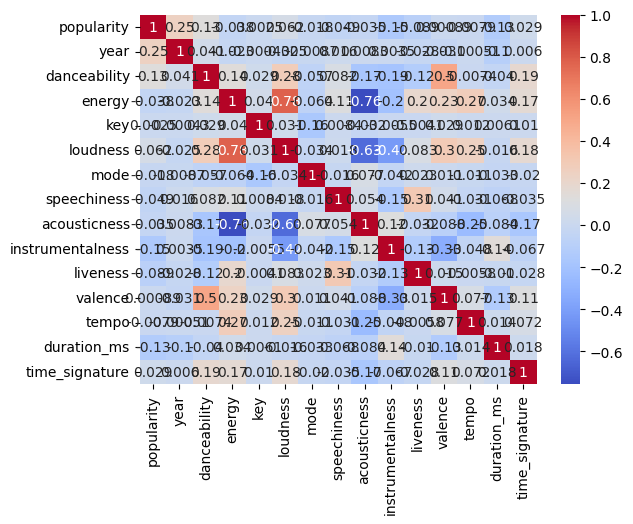

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlations
df_num = df.drop(["Unnamed: 0", "artist_name", "track_name", "track_id", "genre"], axis=1)
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm')
plt.show()

#### Key Observations from Correlation Analysis

##### Year and Popularity
- **Correlation:** 0.35 (moderate positive)
- **Insight:** Newer songs tend to be more popular. This may reflect shifts in music trends or changes in listener preferences over time.

##### Danceability and Popularity
- **Correlation:** 0.10 (weak positive)
- **Insight:** Songs with higher danceability are slightly more likely to be popular, suggesting that danceable tracks appeal more to listeners.

##### Loudness and Popularity
- **Correlation:** 0.10 (weak positive)
- **Insight:** Louder songs might be slightly more popular, which could be due to their prominence in certain genres that emphasize sound dynamics.

##### Instrumentalness and Popularity
- **Correlation:** -0.15 (moderate negative)
- **Insight:** Instrumental tracks tend to be less popular, possibly because listeners often prefer songs with vocals.

##### Duration and Popularity
- **Correlation:** -0.12 (weak negative)
- **Insight:** Longer songs are slightly less likely to be popular, which might reflect the preference for shorter, more engaging tracks in popular music.

---

#### Other Insights

##### Energy and Loudness
- **Correlation:** 0.78 (strong positive)
- **Insight:** Louder songs tend to have higher energy levels, which is expected since loudness is often associated with energetic tracks.

##### Danceability and Valence
- **Correlation:** 0.52 (moderate positive)
- **Insight:** More danceable songs are generally more positive or happy, which aligns with the upbeat nature of dance tracks.

##### Acousticness and Energy
- **Correlation:** -0.75 (strong negative)
- **Insight:** Acoustic tracks are typically less energetic, as they often feature softer, more mellow sounds compared to energetic genres.

##### Instrumentalness and Loudness
- **Correlation:** -0.40 (moderate negative)
- **Insight:** Instrumental tracks tend to be quieter, which could be due to the absence of vocals and the nature of instrumental music production.

---

#### Implications for Modeling

- **Relevant Features for Popularity Prediction:**
  - **Year**, **Danceability**, and **Instrumentalness** show moderate relevance to popularity and may be useful as predictors in regression models.
  
- **Less Useful Features:**
  - **Key**, **Time Signature**, and **Valence** have weak correlations with popularity and may have limited predictive power.

- **Multicollinearity Considerations:**
  - Features like **Energy** and **Loudness** are strongly correlated, so their inclusion in a model should be carefully considered to avoid multicollinearity issues.


## **3. Useful Visualizations for Analyzing the Music Dataset**


### 3.1. Histogram of Popularity
- **Purpose:** To understand the distribution of the target variable, `popularity`.
- **Description:** A histogram provides a quick overview of how popular songs are in the dataset, showing the frequency of songs within different popularity ranges.
- **Key Insight:** Popularity may show a skewed distribution, with many songs falling into lower popularity brackets and fewer songs in the higher popularity range.

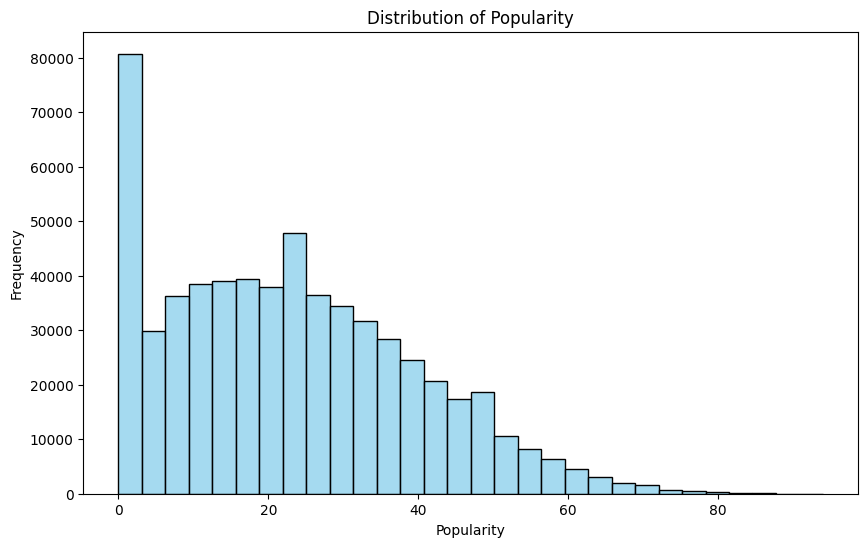

In [4]:
# Plot histogram of popularity
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], kde=False, bins=30, color='skyblue')
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

### 3.2. Popularity over years

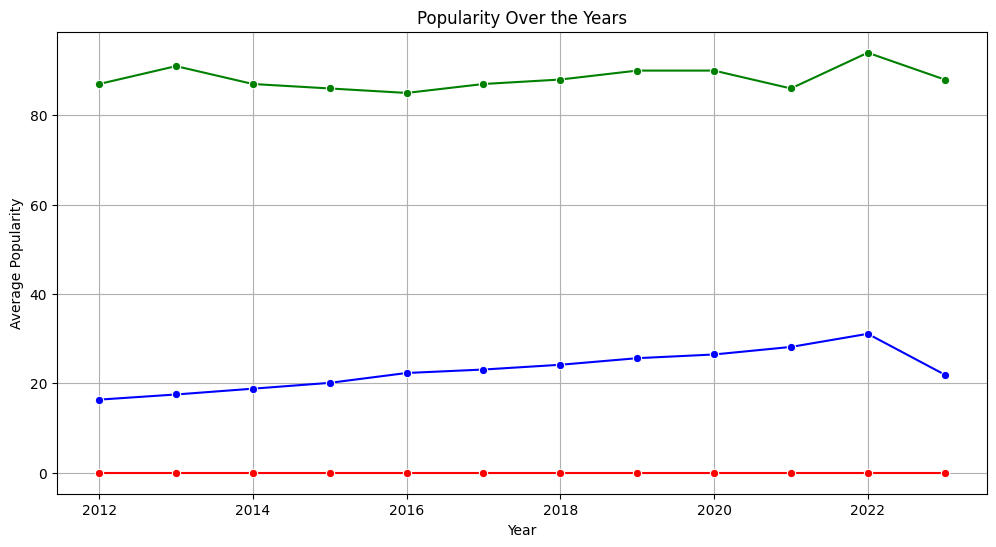

In [5]:
# Group by 'year' and calculate the mean popularity for each year
popularity_by_year = df.groupby('year')['popularity'].mean()
popularity_by_year_min = df.groupby('year')['popularity'].min()
popularity_by_year_max = df.groupby('year')['popularity'].max()

# Plotting the line diagram
plt.figure(figsize=(12, 6))
sns.lineplot(x=popularity_by_year.index, y=popularity_by_year.values, marker='o', color='b')
sns.lineplot(x=popularity_by_year_min.index, y=popularity_by_year_min.values, marker='o', color='r')
sns.lineplot(x=popularity_by_year_max.index, y=popularity_by_year_max.values, marker='o', color='g')
plt.title('Popularity Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.grid(True)
plt.show()

#### 3.3. **Box Plot of Danceability vs. Popularity**
- **Purpose:** To examine how danceability relates to the popularity of songs.
- **Description:** A box plot can show the distribution of danceability values across different popularity categories (e.g., high vs low popularity).
- **Key Insight:** You may observe that higher danceability tends to correspond with higher popularity, with outliers representing songs that don't follow the general trend.

/tmp/ipykernel_79791/3973940101.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='popularity_category', y='danceability', data=df, palette='Set2')


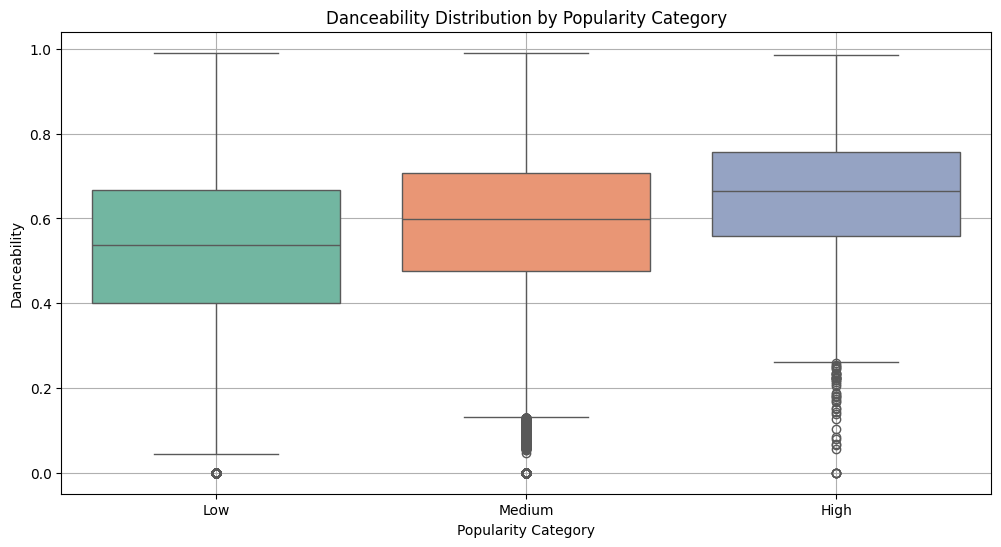

In [6]:
# Categorize popularity into bins (low, medium, high)
bins = [0, 33, 66, 100]  # Adjust these values as per the scale of your popularity data
labels = ['Low', 'Medium', 'High']
df['popularity_category'] = pd.cut(df['popularity'], bins=bins, labels=labels, right=False)

# Create the boxplot for danceability vs popularity category
plt.figure(figsize=(12, 6))
sns.boxplot(x='popularity_category', y='danceability', data=df, palette='Set2')
plt.title('Danceability Distribution by Popularity Category')
plt.xlabel('Popularity Category')
plt.ylabel('Danceability')
plt.grid(True)
plt.show()

#### 3.4. **Violin Plot for Acousticness vs. Popularity**
- **Purpose:** To visualize the distribution of acousticness for songs with varying levels of popularity.
- **Description:** A violin plot combines aspects of both box plots and density plots, showing the distribution of a feature (e.g., acousticness) for different categories of a target variable (e.g., popularity).
- **Key Insight:** The plot may reveal whether acoustic songs tend to be less popular than their electronic counterparts, aligning with the negative correlation observed earlier.

/tmp/ipykernel_79791/2477161046.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='popularity_category', y='acousticness', data=df, palette='Set2')


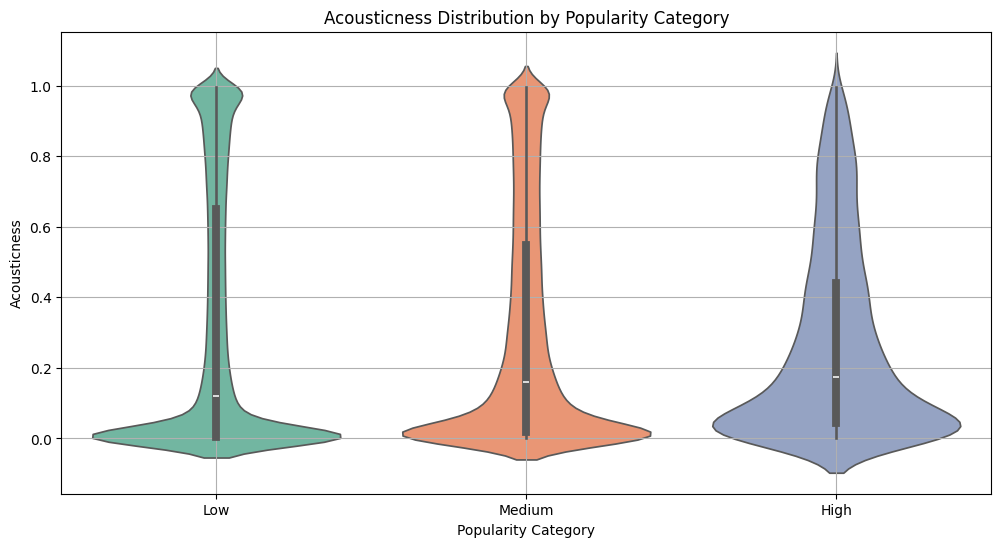

In [7]:
# Categorize popularity into bins (low, medium, high)
bins = [0, 33, 66, 100]  # Adjust these values as per the scale of your popularity data
labels = ['Low', 'Medium', 'High']
df['popularity_category'] = pd.cut(df['popularity'], bins=bins, labels=labels, right=False)

# Create the violin plot for acousticness vs popularity category
plt.figure(figsize=(12, 6))
sns.violinplot(x='popularity_category', y='acousticness', data=df, palette='Set2')
plt.title('Acousticness Distribution by Popularity Category')
plt.xlabel('Popularity Category')
plt.ylabel('Acousticness')
plt.grid(True)
plt.show()

## **4. Clustering Songs Using K-Means**

This guide outlines the steps for clustering a dataset of songs based on their features using the K-Means algorithm. Clustering helps group similar songs together, which can provide valuable insights into patterns in the data.

### **Step 1: Feature Selection**
Identify the key features that describe the characteristics of each song. These features should be numerical and represent measurable aspects of the songs, such as their tempo, loudness, or instrumentalness.

### **Step 2: Standardize the Features**
To ensure all features contribute equally to the clustering process, standardize them. Standardization adjusts the data so that each feature has a mean of 0 and a standard deviation of 1, which is crucial for distance-based algorithms like K-Means.

### **Step 3: Determine the Optimal Number of Clusters**
Use the **Elbow Method** to decide how many clusters (`k`) are most suitable for the dataset. This involves running the K-Means algorithm with different values of `k` and plotting the "inertia" (a measure of clustering quality) for each. The optimal `k` is often at the point where the inertia stops decreasing significantly, forming an "elbow" in the plot.

### **Step 4: Apply K-Means**
Once the optimal number of clusters is identified, apply the K-Means algorithm to the standardized data. Each song will be assigned to one of the clusters based on its similarity to other songs.

### **Step 5: Visualize the Clusters**
Visualize the clusters to understand their distribution. Use tools like pair plots to see how the features separate across clusters. Each cluster is typically represented by a distinct color, making it easier to identify groupings.

### **Step 6: Analyze Clusters**
Examine the characteristics of each cluster by calculating the mean values of the selected features for each group. This helps in understanding what differentiates one cluster from another, such as whether a cluster contains more danceable or acoustic songs.

### **Outcome**
- **Group Similarity**: Songs are grouped into clusters based on shared characteristics.
- **Insights**: Clusters reveal underlying patterns in the data, like relationships between energy and popularity.
- **Applications**: Use clusters for tasks like playlist generation, trend analysis, or feature exploration.

**Next Steps**: Build upon this clustering by exploring additional insights, combining it with other methods (e.g., classification or prediction), or using it for practical applications such as personalized recommendations.


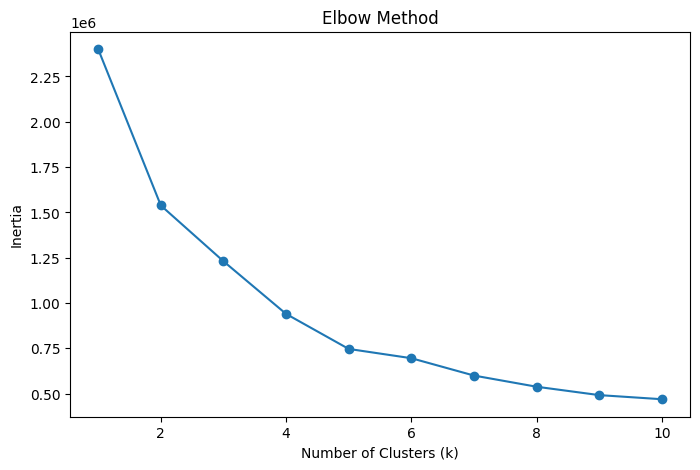

In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select numerical features for clustering
features = ['danceability', 'energy', 'acousticness', 'instrumentalness']  # Adjust based on your dataset
X = df[features]

# Step 1: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Use the elbow method to determine the optimal number of clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Step 3: Apply K-Means with the chosen number of clusters
optimal_k = 5  # Set based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Step 4: Visualize the clusters
# Example: Pair plot with clusters
#sns.pairplot(df, vars=features, hue='cluster', palette='viridis', diag_kind='kde')
#plt.suptitle('Clusters of Songs', y=1.02)
#plt.show()

# Step 5: Analyze clusters
# Get the mean of each feature for every cluster
#cluster_analysis = df.groupby('cluster')[features].mean()
#print(cluster_analysis)

# Save the clustered data to a CSV
#df.to_csv('export/clustered_songs.csv', index=False)

### **Results**

This clustering analysis groups songs into five distinct clusters based on their **danceability**, **energy**, **acousticness**, and **instrumentalness**. Below is an interpretation of the key characteristics and possible insights from each cluster.

#### **Cluster Summaries**
##### **Cluster 0**: **Energetic and Danceable Tracks**
- **Danceability:** 0.704 (High)
- **Energy:** 0.714 (High)
- **Acousticness:** 0.190 (Low)
- **Instrumentalness:** 0.031 (Low)
- **Interpretation:**
  - Songs in this cluster are highly energetic and danceable, with minimal acoustic or instrumental elements.
  - Likely represents **upbeat pop**, **dance music**, or **electronic genres**.
  - Suitable for activities like parties or workouts.

##### **Cluster 1**: **Acoustic and Balanced**
- **Danceability:** 0.518 (Moderate)
- **Energy:** 0.405 (Moderate-Low)
- **Acousticness:** 0.735 (High)
- **Instrumentalness:** 0.030 (Low)
- **Interpretation:**
  - This cluster represents moderately danceable and less energetic tracks with a strong acoustic component.
  - Likely includes **folk**, **indie acoustic**, or **ballads**.
  - Ideal for relaxing or casual listening.

##### **Cluster 2**: **Soft and Instrumental**
- **Danceability:** 0.369 (Low)
- **Energy:** 0.189 (Very Low)
- **Acousticness:** 0.878 (Very High)
- **Instrumentalness:** 0.854 (Very High)
- **Interpretation:**
  - Cluster 2 contains soft, highly acoustic, and predominantly instrumental songs.
  - Common genres could include **classical music**, **ambient tracks**, or **instrumental soundtracks**.
  - Suitable for studying, meditation, or background music.

##### **Cluster 3**: **Energetic and Non-Acoustic**
- **Danceability:** 0.426 (Low-Moderate)
- **Energy:** 0.848 (Very High)
- **Acousticness:** 0.059 (Very Low)
- **Instrumentalness:** 0.052 (Low)
- **Interpretation:**
  - Tracks in this cluster are highly energetic but not particularly danceable or acoustic.
  - Likely includes **hard rock**, **electronic music**, or **high-energy alternative**.
  - Perfect for high-intensity workouts or motivational moments.

##### **Cluster 4**: **Danceable and Instrumental**
- **Danceability:** 0.566 (Moderate-High)
- **Energy:** 0.777 (High)
- **Acousticness:** 0.077 (Low)
- **Instrumentalness:** 0.796 (High)
- **Interpretation:**
  - Songs in this cluster combine danceable rhythms with a significant instrumental component.
  - Could represent **instrumental electronic music**, **dance tracks**, or **movie soundtracks**.
  - Ideal for dynamic yet focused activities like working or driving.

#### **General Observations**
- **Energy vs. Acousticness:**
  - Clusters with high energy (Clusters 0, 3, 4) tend to have lower acousticness, suggesting a trade-off between these attributes.
  - Conversely, Clusters 1 and 2 have higher acousticness and lower energy, likely reflecting softer, acoustic tracks.

- **Instrumentalness:**
  - Clusters 2 and 4 stand out for their high instrumentalness, making them distinct from other clusters.
  - This suggests two types of instrumental music: softer, acoustic (Cluster 2) and energetic, danceable (Cluster 4).

- **Danceability:**
  - Clusters 0 and 4 are the most danceable, which makes them suitable for playlists focused on movement or rhythm-heavy experiences.


## **5. Making predictions**

In [9]:
# One-hot encode the cluster membership
df_encoded = pd.get_dummies(df, columns=['cluster'], drop_first=True)

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Clean dataframe
df_num = df_encoded.drop(["Unnamed: 0", "artist_name", "track_name", "track_id", "genre", "popularity_category"], axis=1)

# Step 3: Defining the target
features = df_num
target = df_num['popularity']

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 5: Train a regression model (Random Forest)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Make predictions and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 8.995000000000042e-06


## **6. Counterfactual Analysis**

In [29]:
import numpy as np

def optimize_feature_for_song(model, song_df, song_index=0, delta=0.2, feature_names=None):
    """
    Optimizes a single feature for a given song (row in the DataFrame) to maximize predicted popularity.
    
    Parameters:
    - model: Trained regression model with a `predict` method.
    - song_df: DataFrame, where each row represents a song's features.
    - song_index: Index of the song in the DataFrame to optimize.
    - delta: Maximum allowed change for any feature (default: 0.2).
    - feature_names: List of feature names (optional, for better interpretability).
    
    Returns:
    - best_feature: The name (or index) of the feature to change.
    - optimal_value: The new value for the selected feature.
    - predicted_increase: The expected increase in popularity.
    """
    best_feature = None
    optimal_value = None
    max_increase = -np.inf
    
    original_features = song_df.iloc[song_index].values  # Get the feature vector for the specified song
    original_popularity = model.predict([original_features])[0]  # Predict initial popularity
    
    # Loop over each feature in the song's feature vector
    for j in range(len(original_features)):  
        original_value = original_features[j]
        
        # Generate candidate values within the allowed range
        candidates = np.linspace(max(0, original_value - delta), 
                                 min(1, original_value + delta), 
                                 10)
        
        for candidate in candidates:
            # Perturb the feature and predict the new popularity
            perturbed_features = original_features.copy()
            perturbed_features[j] = candidate
            predicted_popularity = model.predict([perturbed_features])[0]
            
            # Calculate the increase in popularity
            increase = predicted_popularity - original_popularity
            
            if increase > max_increase:
                max_increase = increase
                best_feature = j
                optimal_value = candidate
    
    # Map the feature index to a name, if provided
    if feature_names:
        best_feature = feature_names[best_feature]
    
    return best_feature, optimal_value, max_increase

In [28]:
# Find a song
song = df_encoded[df_encoded['track_id'] == "6k5DKQMC96daK6fSvAxdQv"].drop(["Unnamed: 0", "artist_name", "track_name", "track_id", "genre", "popularity_category"], axis=1)
print(type(song))

<class 'pandas.core.frame.DataFrame'>


In [31]:
print(song.to_numpy()[0])

best_feature, optimal_value, predicted_increase = optimize_feature_for_song(
    model=model,
    song_df=song
)

print(f"Best feature to change: {best_feature}")
print(f"Optimal value for the feature: {optimal_value:.3f}")
print(f"Predicted increase in popularity: {predicted_increase}")

[57 2022 0.752 0.935 11 -6.263 1 0.203 0.0742 0.0352 0.081 0.31 126.022
 155677 4 False False False False]


/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/codespace/.loc

Best feature to change: 0
Optimal value for the feature: 56.800
Predicted increase in popularity: 0.0


/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/codespace/.loc